## Media  Analytics
* The impact of social media on businesses in the recent days. 
* Its quite substantial analyzing the steps taken into a successful media strategy. 
* In the below given data set acquired from kaggle Which explains media .marketing spending data for numerous campaigns with respect to division levels in the channel week

In [336]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from  sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.utils import shuffle
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import warnings
from PIL import Image
warnings.filterwarnings('ignore')

### Data Set
* The data set contains 3051 rows and nine columns.
* The timeline of the data set starts from 2018 January till 2020 February.
* The features of this data set give the glimpse of Media channel spending information through applications such as Facebook, Google search, email impressions, youtube and others.

In [337]:
ds = pd.read_csv('Sample Media Spend Data.csv')
ds

,Division,Calendar_Week,Paid_Views,Organic_Views,Google_Impressions,Email_Impressions,Facebook_Impressions,Affiliate_Impressions,Overall_Views,Sales
0,A,1/6/2018,392,422,408,3.498950e+05,73580,12072,682,59417
1,A,1/13/2018,787,904,110,5.062702e+05,11804,9499,853,56806
2,A,1/20/2018,81,970,742,4.300422e+05,52232,17048,759,48715
3,A,1/27/2018,25,575,65,4.177457e+05,78640,10207,942,72047
4,A,2/3/2018,565,284,295,4.085058e+05,40561,5834,658,56235
...,...,...,...,...,...,...,...,...,...,...
3046,Z,2/1/2020,29239,25311,622406,1.459071e+06,45026,12098,53667,82707
3047,Z,2/8/2020,26230,28031,624409,5.342505e+05,227070,9548,53665,84503
3048,Z,2/15/2020,24749,31281,439362,4.227182e+05,393685,9861,55561,147325
3049,Z,2/22/2020,20713,30356,464178,6.085799e+05,424676,10221,49221,111525


In [338]:
ds.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3051 entries, 0 to 3050
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Division               3051 non-null   object 
 1   Calendar_Week          3051 non-null   object 
 2   Paid_Views             3051 non-null   int64  
 3   Organic_Views          3051 non-null   int64  
 4   Google_Impressions     3051 non-null   int64  
 5   Email_Impressions      3051 non-null   float64
 6   Facebook_Impressions   3051 non-null   int64  
 7   Affiliate_Impressions  3051 non-null   int64  
 8   Overall_Views          3051 non-null   int64  
 9   Sales                  3051 non-null   int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 238.5+ KB


### Data Preprocessing 
#### 1) Check for Missing Values
* Handling missing values it's in key preprocessing step for modeling purposes and analysis of the data.


In [339]:
ds.isnull().sum()

Division                 0
Calendar_Week            0
Paid_Views               0
Organic_Views            0
Google_Impressions       0
Email_Impressions        0
Facebook_Impressions     0
Affiliate_Impressions    0
Overall_Views            0
Sales                    0
dtype: int64

#### 2) Type verifications
* Firstly, Handling Miss Classified features in a data through appropriate conversion is crucial. 
* Secondly converting categorical features into numerics provides easy processing of data.

In [340]:
ds['Calendar_Week']=ds['Calendar_Week'].astype('datetime64[ns]')
ds['Calendar_Week']= pd.to_numeric(ds['Calendar_Week'])

In [341]:
ds['Division'] = OrdinalEncoder().fit_transform(ds[['Division']])

In [342]:
ds.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3051 entries, 0 to 3050
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Division               3051 non-null   float64
 1   Calendar_Week          3051 non-null   int64  
 2   Paid_Views             3051 non-null   int64  
 3   Organic_Views          3051 non-null   int64  
 4   Google_Impressions     3051 non-null   int64  
 5   Email_Impressions      3051 non-null   float64
 6   Facebook_Impressions   3051 non-null   int64  
 7   Affiliate_Impressions  3051 non-null   int64  
 8   Overall_Views          3051 non-null   int64  
 9   Sales                  3051 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 238.5 KB


#### 3) Corelation Analysis

<AxesSubplot:>

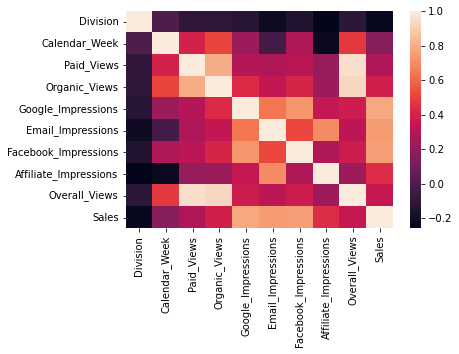

In [343]:
corelations = ds.corr()
sns.heatmap(corelations)

In [344]:
print(corelations)

                           Division  Calendar_Week  Paid_Views  Organic_Views  \
Division               1.000000e+00   6.530754e-14   -0.101387      -0.106128   
Calendar_Week          6.530754e-14   1.000000e+00    0.402456       0.510170   
Paid_Views            -1.013868e-01   4.024563e-01    1.000000       0.798104   
Organic_Views         -1.061280e-01   5.101698e-01    0.798104       1.000000   
Google_Impressions    -1.267227e-01   2.277622e-01    0.305230       0.429167   
Email_Impressions     -2.139016e-01  -2.904163e-02    0.290203       0.342697   
Facebook_Impressions  -1.463921e-01   2.892512e-01    0.318325       0.410265   
Affiliate_Impressions -2.598442e-01  -2.220451e-01    0.215768       0.231719   
Overall_Views         -1.092182e-01   4.741381e-01    0.960312       0.934390   
Sales                 -2.322848e-01   1.648479e-01    0.289688       0.390960   

                       Google_Impressions  Email_Impressions  \
Division                        -0.126723   

In [363]:
x = ds.loc[:,~ds.columns.isin(['Division','Sales'])]
y = ds[['Sales']]

#### 4) Split Data into test & Train

In [364]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=1/3,random_state = 125)

#### 5) Scale Data for better Modeling Process

In [365]:
std_sclr = StandardScaler()
x_train = std_sclr.fit_transform(xtrain)
x_test = std_sclr.fit_transform(xtest)

### Data Modeling

#### 1) Random Forest

In [370]:
model2= RandomForestRegressor()
model2.fit(x_train,ytrain)
ypred2=model2.predict(x_test)
print('\n Mean Absolute Error',mean_absolute_error(ytest,ypred2))
print('\n Root Mean Absolute Error',np.sqrt(mean_absolute_error(ytest,ypred2)))


 Mean Absolute Error 42134.86458210423

 Root Mean Absolute Error 205.2677874925928


[Text(0.5, 0, 'Actual'), Text(0, 0.5, 'Predicted')]

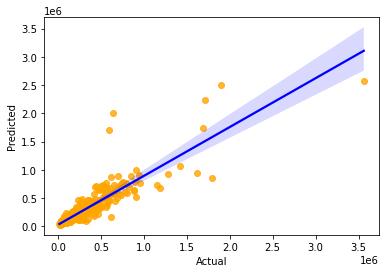

In [349]:
plot = sns.regplot(ytest,ypred2,scatter_kws={"color": "orange"}, line_kws={"color": "blue"})
plot.set(xlabel='Actual', ylabel='Predicted')

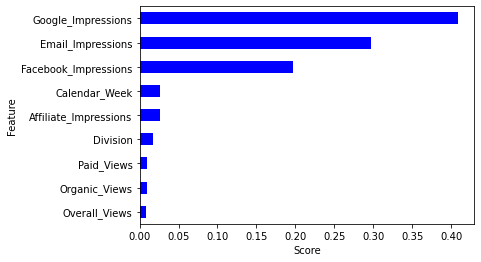

In [350]:
imp_features = pd.Series(model2.feature_importances_, index = x.columns)
imp_features = imp_features.sort_values(ascending = True)
imp_features.plot(kind = 'barh', color = 'blue')
plt.ylabel("Feature")
plt.xlabel("Score")
plt.show()

#### 2) XG boost

In [372]:
model4= XGBRegressor()
model4.fit(x_train,ytrain)
ypred4=model4.predict(x_test)
print('\n Mean Absolute Error',mean_absolute_error(ytest,ypred4))
print('\n Root Mean Absolute Error',np.sqrt(mean_absolute_error(ytest,ypred4)))


 Mean Absolute Error 38339.44756617963

 Root Mean Absolute Error 195.8046157938562


[Text(0.5, 0, 'Actual'), Text(0, 0.5, 'Predicted')]

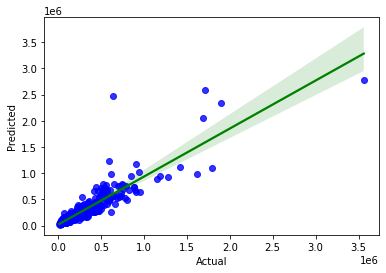

In [352]:
plot = sns.regplot(ytest,ypred4,scatter_kws={"color": "blue"}, line_kws={"color": "green"})
plot.set(xlabel='Actual', ylabel='Predicted')

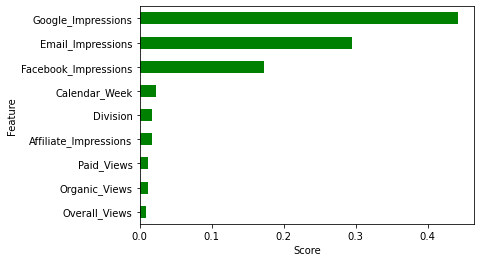

In [353]:
imp_features = pd.Series(model4.feature_importances_, index = x.columns)
imp_features = imp_features.sort_values(ascending = True)
imp_features.plot(kind = 'barh',color = 'green')
plt.ylabel("Feature")
plt.xlabel("Score")
plt.show()

#### 3) Gradient Boosting Regressor

In [371]:
model3= GradientBoostingRegressor()
model3.fit(x_train,ytrain)
ypred3=model3.predict(x_test)
print('\n Mean Absolute Error',mean_absolute_error(ytest,ypred3))
print('\n Root Mean Absolute Error',np.sqrt(mean_absolute_error(ytest,ypred3)))


 Mean Absolute Error 41804.37843690949

 Root Mean Absolute Error 204.46119053969505


[Text(0.5, 0, 'Actual'), Text(0, 0.5, 'Predicted')]

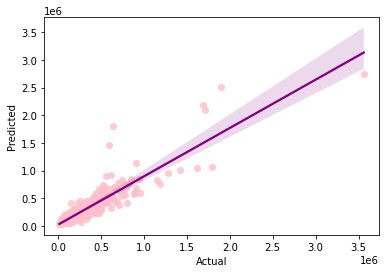

In [355]:
plot = sns.regplot(ytest,ypred3,scatter_kws={"color": "pink"}, line_kws={"color": "purple"})
plot.set(xlabel='Actual', ylabel='Predicted')

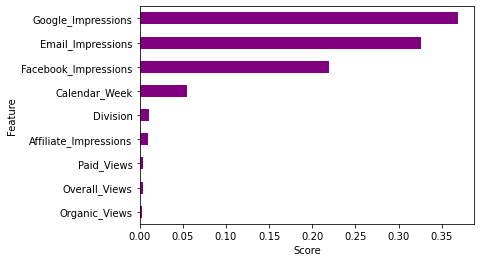

In [356]:
imp_features = pd.Series(model3.feature_importances_, index = x.columns)
imp_features = imp_features.sort_values(ascending = True)
imp_features.plot(kind = 'barh',color = 'purple')
plt.ylabel("Feature")
plt.xlabel("Score")
plt.show()

### Summary:-
* For the above media marketing data we have used three models machine learning models such as gradient,XGBRegressor and random forest regressors. upon which I discovered root squre mean absolute error of the  XGBRegressor model had the least of 195, comparitively.
* From the correlation & Feature analysis performed above stages of this file, we can clearly see that sales have a high influence with respect to Facebook, email and Google search Features.
* Thus it is highly recommended to use these features as a tool for proactive and effective marketing of media.